In [137]:
import torch
from torch import nn
from tqdm import tqdm # for progressbar
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.optim.lr_scheduler as lr_scheduler


In [138]:
class MNISTNeuralNet(nn.Module):
    def __init__(self,config:dict):
        super().__init__()

        self.conv = nn.Sequential( #1x28x28
            nn.Conv2d(in_channels=1,out_channels=8,kernel_size=5), # 8x24x24
            nn.Dropout2d(p=0.4,inplace=True),
            nn.LeakyReLU(negative_slope=0.02,inplace=True),
            nn.BatchNorm2d(num_features=8),
            nn.MaxPool2d(2), # 8x12x12
            nn.Conv2d(in_channels=8,out_channels=32,kernel_size=3), # 32x10x10
            nn.Dropout2d(p=0.4,inplace=True),
            nn.LeakyReLU(negative_slope=0.02,inplace=True),
            nn.BatchNorm2d(num_features=32),
            nn.MaxPool2d(2), #32x5x5
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=2), # 64x4x4
            nn.Dropout2d(p=0.4,inplace=True),
            nn.BatchNorm2d(64)
            )

        self.linear = nn.Sequential(
            nn.Linear(in_features=64*4*4,out_features=512),
            nn.LeakyReLU(negative_slope=0.02,inplace=True),
            nn.BatchNorm1d(num_features=512),
            nn.Dropout(p=0.4,inplace=True),
            nn.Linear(in_features=512,out_features=config['num_classes']),
            nn.Softmax(dim=1))

    def forward(self,x):
        x = self.conv(x)
        x = x.view(x.size(0),-1)
        x = self.linear(x)
        return x


In [139]:
config = {'num_classes' : 10}

In [140]:
model = MNISTNeuralNet(config=config)

In [141]:
model.get_parameter

<bound method Module.get_parameter of MNISTNeuralNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.4, inplace=True)
    (2): LeakyReLU(negative_slope=0.02, inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): Dropout2d(p=0.4, inplace=True)
    (7): LeakyReLU(negative_slope=0.02, inplace=True)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (11): Dropout2d(p=0.4, inplace=True)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.02, inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=True)
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)>

In [142]:
loss_fnc = nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.AdamW(lr=0.01,params=model.parameters())

scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [144]:
transform = transforms.Compose([transforms.ToTensor()])

In [145]:
train = torchvision.datasets.MNIST(root='./',
                                   download=True,
                                   transform=transform,
                                   train=True)

test = torchvision.datasets.MNIST(root='./',
                                   download=True,
                                   transform=transform,
                                   train=False)

### **If BatchNorm2D is used, always use drop_last = True in DataLoader** 

In [147]:
train_dataloader = DataLoader(train,batch_size = 16,shuffle=True,drop_last=True)
val_dataloader = DataLoader(test,batch_size = 16,shuffle=False,drop_last=True)

### **To just check the model use**

```
with torch.no_grad():
        model.eval()
```

torch.Size([1, 28, 28])


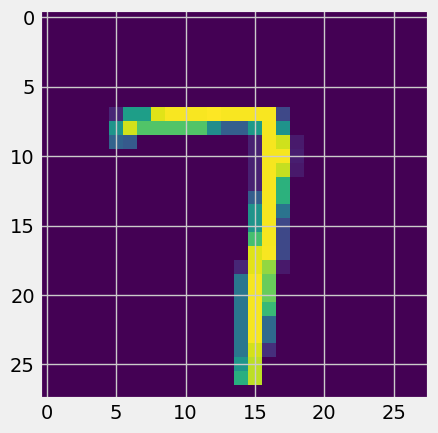

Pred Prob = 0.10586286336183548 || Pred Elem = 0
Loss = 2.303502082824707


In [149]:
for i,(data,target) in enumerate(train_dataloader):
    with torch.no_grad():
        model.eval()
        print(data[0].shape)
        plt.imshow(data[0].permute(1, 2, 0))
        plt.show()
        pred = model(data[0].unsqueeze(0))
        prob,idx = torch.max(pred,dim=1)
        print(f"Pred Prob = {prob[0]} || Pred Elem = {idx[0]}")

        loss = loss_fnc(pred,target[0].unsqueeze(0))

        print(f"Loss = {loss}")

    break

In [150]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [151]:
len(train_dataloader)

3750

In [152]:
model.to(device)

MNISTNeuralNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.4, inplace=True)
    (2): LeakyReLU(negative_slope=0.02, inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): Dropout2d(p=0.4, inplace=True)
    (7): LeakyReLU(negative_slope=0.02, inplace=True)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (11): Dropout2d(p=0.4, inplace=True)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slop

### **To see the progress bar, add tqdm library**

In [154]:
def trainFunc(epoch):
    model.train()
    epoch_loss = 0
    total_correct = 0

    for batch_idx,(data,target) in enumerate(tqdm(train_dataloader)):
        (data,target) = (data.to(device),target.to(device))

        optimizer.zero_grad()

        pred = model(data)
        loss = loss_fnc(pred,target)

        loss.backward()
        optimizer.step()

        epoch_loss = epoch_loss + (loss.item()*target.shape[0])
        _,output = torch.max(pred,dim=1)
        total_correct = total_correct + (output==target).sum().item()



    epoch_loss = epoch_loss / len(train_dataloader.dataset)
    total_correct = total_correct / len(train_dataloader.dataset)

    print(f"Epoch = {epoch} || Train Loss = {epoch_loss} || Train Accuracy = {total_correct}")
    return epoch_loss,total_correct

### **In inference time, always use**

```
with torch.no_grad():
  model.eval()
```

In [155]:
def valFunc(epoch):
    model.eval()
    epoch_loss = 0
    total_correct = 0
    with torch.no_grad():
        for batch_idx,(data,target) in enumerate(tqdm(val_dataloader)):
            (data,target) = (data.to(device),target.to(device))

            pred = model(data)
            loss = loss_fnc(pred,target)

            epoch_loss = epoch_loss + (loss.item()*target.shape[0])
            _,output = torch.max(pred,dim=1)
            total_correct = total_correct + (output==target).sum().item()

    epoch_loss = epoch_loss / len(val_dataloader.dataset)
    total_correct = total_correct / len(val_dataloader.dataset)

    print(f"Epoch = {epoch} || Val Loss = {epoch_loss} || Val Accuracy = {total_correct}")
    return epoch_loss,total_correct

In [157]:
def trainer(epochs):
    Train_loss = []
    Train_accuracy = []
    Val_loss = []
    Val_accuracy = []

    for i in range(1,epochs+1):
        TL,TA = trainFunc(i)
        Train_loss.append(TL)
        Train_accuracy.append(TA)
        VL,VA = valFunc(i)
        Val_loss.append(VL)
        Val_accuracy.append(VA)
        print("\n---------------------------------------------------\n")

    xx = np.arange(epochs)
    plt.style.use("fivethirtyeight")

    acctr = torch.Tensor(Train_accuracy).detach().cpu().numpy()
    lsstr = torch.Tensor(Train_loss).detach().cpu().numpy()
    accte = torch.Tensor(Val_accuracy).detach().cpu().numpy()
    lsste = torch.Tensor(Val_loss).detach().cpu().numpy()

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
    fig.suptitle('ACC vs LOSS')
    ax1.plot(xx, acctr,label='Train')
    ax1.plot(xx,accte,label='Val')
    ax1.legend(loc="best")
    ax2.plot(xx, lsstr,label='Train')
    ax2.plot(xx, lsste,label='Val')
    ax2.legend(loc="best")
    plt.show()



In [ ]:
trainer(epochs=50)

100%|██████████| 3750/3750 [00:22<00:00, 163.81it/s]


Epoch = 1 || Train Loss = 1.5910031572024028 || Train Accuracy = 0.8774333333333333


100%|██████████| 625/625 [00:01<00:00, 342.18it/s]


Epoch = 1 || Val Loss = 1.4946909334182739 || Val Accuracy = 0.967

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.53it/s]


Epoch = 2 || Train Loss = 1.5366194093704224 || Train Accuracy = 0.9267333333333333


100%|██████████| 625/625 [00:01<00:00, 342.27it/s]


Epoch = 2 || Val Loss = 1.4852806024551393 || Val Accuracy = 0.977

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 166.26it/s]


Epoch = 3 || Train Loss = 1.5276788925806681 || Train Accuracy = 0.9346333333333333


100%|██████████| 625/625 [00:01<00:00, 334.60it/s]


Epoch = 3 || Val Loss = 1.4837564975738526 || Val Accuracy = 0.9786

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 170.04it/s]


Epoch = 4 || Train Loss = 1.522307399336497 || Train Accuracy = 0.9396


100%|██████████| 625/625 [00:01<00:00, 333.46it/s]


Epoch = 4 || Val Loss = 1.4806860067367553 || Val Accuracy = 0.9807

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 169.49it/s]


Epoch = 5 || Train Loss = 1.51967762854894 || Train Accuracy = 0.9417


100%|██████████| 625/625 [00:01<00:00, 337.45it/s]


Epoch = 5 || Val Loss = 1.4790981576919555 || Val Accuracy = 0.9822

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.64it/s]


Epoch = 6 || Train Loss = 1.5163879453023275 || Train Accuracy = 0.9454333333333333


100%|██████████| 625/625 [00:01<00:00, 342.48it/s]


Epoch = 6 || Val Loss = 1.48014693069458 || Val Accuracy = 0.9814

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.40it/s]


Epoch = 7 || Train Loss = 1.5133341682751973 || Train Accuracy = 0.9481166666666667


100%|██████████| 625/625 [00:01<00:00, 335.51it/s]


Epoch = 7 || Val Loss = 1.4775344638824464 || Val Accuracy = 0.984

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 170.40it/s]


Epoch = 8 || Train Loss = 1.5122069012006123 || Train Accuracy = 0.94945


100%|██████████| 625/625 [00:01<00:00, 342.50it/s]


Epoch = 8 || Val Loss = 1.4769498208999634 || Val Accuracy = 0.9847

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.58it/s]


Epoch = 9 || Train Loss = 1.510177134068807 || Train Accuracy = 0.9514


100%|██████████| 625/625 [00:01<00:00, 336.68it/s]


Epoch = 9 || Val Loss = 1.4787980827331544 || Val Accuracy = 0.9822

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 170.44it/s]


Epoch = 10 || Train Loss = 1.5106599644978842 || Train Accuracy = 0.9509


100%|██████████| 625/625 [00:01<00:00, 334.54it/s]


Epoch = 10 || Val Loss = 1.4759995294570922 || Val Accuracy = 0.985

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.33it/s]


Epoch = 11 || Train Loss = 1.5063037643114725 || Train Accuracy = 0.95525


100%|██████████| 625/625 [00:01<00:00, 329.55it/s]


Epoch = 11 || Val Loss = 1.4758477369308471 || Val Accuracy = 0.9854

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 169.88it/s]


Epoch = 12 || Train Loss = 1.5069963938713073 || Train Accuracy = 0.9541833333333334


100%|██████████| 625/625 [00:01<00:00, 328.03it/s]


Epoch = 12 || Val Loss = 1.4751623807907104 || Val Accuracy = 0.9869

---------------------------------------------------



 17%|█▋        | 645/3750 [00:04<00:17, 181.55it/s]

### **To Select single element Randomly, add shuffle = True**

In [ ]:
val_dataloader = DataLoader(test,batch_size = 16,shuffle=True)

In [ ]:
data = next(iter(val_dataloader))[0]
with torch.no_grad():
  model.eval()
  print(data[0].shape)
  plt.imshow(data[0].permute(1, 2, 0))
  plt.show()
  pred = model(data[0].unsqueeze(0).to(device))
  prob,idx = torch.max(pred,dim=1)
  print(f"Pred Prob = {prob[0]} || Pred Elem = {idx[0]}")